##  Part 2: Multivariate Analysis


### Importing packages

In [3]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("eda.csv") #import as df

### Preparing the dataframe and adding columns

In [4]:
# Define central zip codes
central_zipcodes = [
    98101, 98104, 98105, 98109, 98121, 98122, 98154, 98164,  # Downtown
    98103, 98107, 98115, 98117,                             # North/Central Seattle
    98118, 98144, 98106, 98108                              # South Seattle (inner)
]


# Adding a central/non-central flag to ZIP codes in new column called 'location_type'
df['location_type'] = df['zipcode'].apply(lambda z: 'central' if z in central_zipcodes else 'non-central')

# Removing multiple entries for the same house and keeping the most recent sale
df_latest = df.sort_values('date').drop_duplicates('house_id', keep='last') # Get the latest entry for each house_id

# Adding lot price per square foot metric in new column (Most recent sales)
df_latest['price_per_sqft'] = df_latest['price'] / df_latest['sqft_lot'] # seems as the whole property lot measurement
df_latest['price_liv_per_sqft'] = df_latest['price'] / df_latest['sqft_living'] # not used after all, decided for sqft_lot

# Sanity check (should be 21420 rows)
print(f"Original: {df.shape[0]} rows")
print(f"Latest sales only: {df_latest.shape[0]} rows") 


Original: 21597 rows
Latest sales only: 21420 rows


## 4.2 Multivariate Analysis

In [5]:
df_latest.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1',
       'location_type', 'price_per_sqft', 'price_liv_per_sqft'],
      dtype='object')

In [6]:
interesting_columns = ['bedrooms', 
                     'bathrooms', 
                     'sqft_living', 
                     'sqft_lot', 
                     'floors',
                     'waterfront', 
                     'view', 
                     'condition', 
                     'grade', 
                     'sqft_above',
                     'yr_built', 
                     'yr_renovated', 
                     'zipcode', 
                     'sqft_living15', 
                     'price', 
                     'price_per_sqft',
                     "price_liv_per_sqft"]

In [7]:
# Info: Uncomment this graph, generation will take ca. 2min so be aware


# sns.pairplot(df_latest, 
#              vars = ['price_per_sqft',
#                      'price',
#                      'yr_built', 
#                      'yr_renovated', 
#                      "zipcode"],
#              hue = "location_type")
        

Info: yr_renovated has a lot of "0" values that are preventing a better analysis, maybe worth making them n/a?

In [8]:
# Info: Uncomment this graph, generation will take ca. 2min so be aware

# sns.pairplot(df_latest, 
#              vars = ['sqft_living', 
#                      'condition', 
#                      'grade', 
#                      'price',
#                      'price_per_sqft'],
#              hue = "location_type")

In [9]:
df_latest[interesting_columns].dropna().corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,price,price_per_sqft,price_liv_per_sqft
bedrooms,1.000000,0.512539,0.574152,0.025682,0.180194,-0.005943,0.080470,0.019060,0.355550,0.474899,0.152584,0.016391,-0.148282,0.392391,0.306196,-0.056702,-0.205202
bathrooms,0.512539,1.000000,0.753535,0.079887,0.504741,0.065701,0.180196,-0.133748,0.664635,0.685282,0.503950,0.047202,-0.198423,0.568899,0.525149,0.204752,-0.091642
sqft_living,0.574152,0.753535,1.000000,0.164485,0.358524,0.111645,0.284172,-0.065019,0.763988,0.876274,0.312653,0.049711,-0.195315,0.756428,0.705274,0.028416,-0.088782
sqft_lot,0.025682,0.079887,0.164485,1.000000,-0.010573,0.025939,0.077340,-0.016639,0.108046,0.173381,0.051109,0.002120,-0.129462,0.144584,0.083247,-0.207754,-0.033641
floors,0.180194,0.504741,0.358524,-0.010573,1.000000,0.018107,0.026917,-0.263970,0.459233,0.527995,0.486515,-0.001829,-0.056923,0.281202,0.257720,0.473785,-0.000437
waterfront,-0.005943,0.065701,0.111645,0.025939,0.018107,1.000000,0.411084,0.016420,0.083122,0.077130,-0.024448,0.087941,0.030750,0.090695,0.274769,0.022854,0.195137
view,0.080470,0.180196,0.284172,0.077340,0.026917,0.411084,1.000000,0.044893,0.246640,0.169887,-0.058294,0.097794,0.089572,0.275589,0.395661,0.075031,0.222671
condition,0.019060,-0.133748,-0.065019,-0.016639,-0.263970,0.016420,0.044893,1.000000,-0.152248,-0.160836,-0.370380,-0.061504,0.003222,-0.098933,0.031997,-0.086880,0.104056
grade,0.355550,0.664635,0.763988,0.108046,0.459233,0.083122,0.246640,-0.152248,1.000000,0.758582,0.441557,0.011537,-0.181294,0.716288,0.662736,0.217654,0.118892
sqft_above,0.474899,0.685282,0.876274,0.173381,0.527995,0.077130,0.169887,-0.160836,0.758582,1.000000,0.417739,0.017895,-0.256417,0.732984,0.610924,0.000260,-0.083117


| Feature                | Correlation |
|------------------------|-------------|
| sqft_living            | 0.70        |
| grade                  | 0.66        |
| sqft_above             | 0.61        |
| sqft_living15          | 0.58        |
| price per living sqft  | 0.55        |
| bathrooms              | 0.52        |

<Axes: >

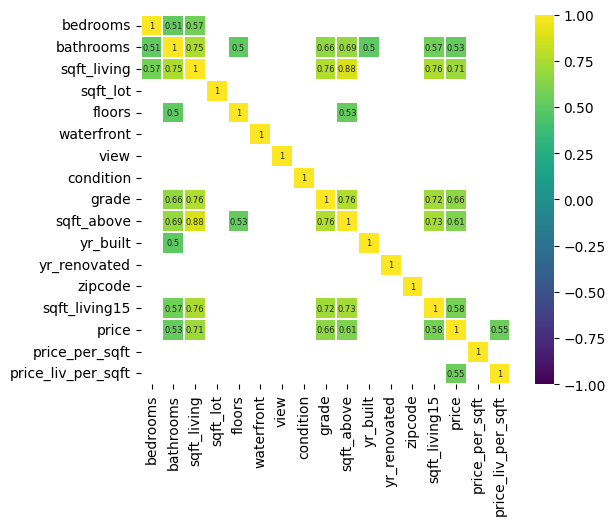

In [10]:
#checking if central and non-central differ in correlation

df_central = df_latest[df_latest["location_type"] == "central"]
df_noncentral = df_latest[df_latest["location_type"] == "non-central"]

corr = df_latest[interesting_columns].dropna().corr()

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 6}, square=True)

In [11]:
# OUTLIER TANGENT
# There are some outliers in zipcode 98039 that need investigating, 
# making this the ZIP with the highest average price

df_98039 = df_latest[df_latest["zipcode"]==98039]
#sns.boxplot(df_98039, y = "price")

df_98039.sort_values("price", ascending=False).head(3)

# don't know how to exclude them tho
# Question for Evgeny: How do i remove outliers from DF

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,location_type,price_per_sqft,price_liv_per_sqft
9245,9208900037,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3,13,...,-122.240,4540.0,42730.0,2014-09-19,6890000.0,9208900037,9246,non-central,219.608593,696.663296
4407,2470100110,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3,13,...,-122.233,3560.0,24345.0,2014-08-04,5570000.0,2470100110,4408,non-central,158.829736,605.434783
4145,6447300265,4.0,5.50,7080.0,16573.0,2.0,0.0,0.0,3,12,...,-122.224,3140.0,15996.0,2014-10-14,4000000.0,6447300265,4146,non-central,241.356423,564.971751


## 5. Finding answers to the request 
#### Grouping all data by zip code to compare averages

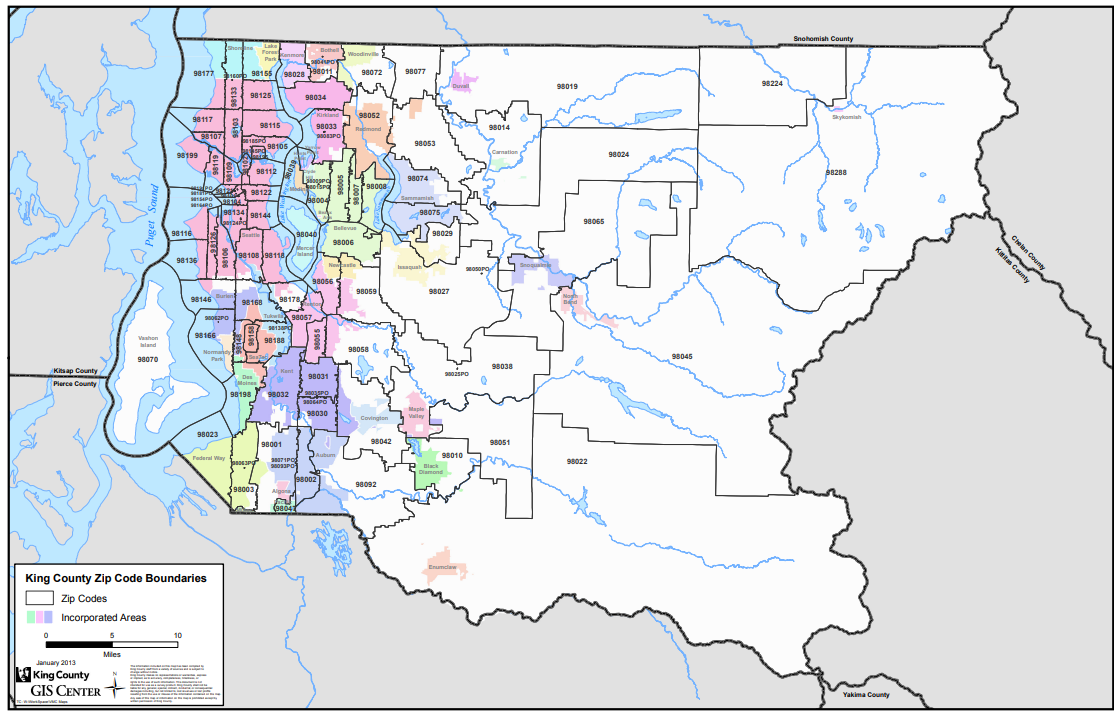

__-First part of task-__

Amy wants to sell several central houses (top10%) over time

__-Assumptions-__

- Amy wants to sell houses in a central ZIP
- with high sales count so they sell
- with the highest price_per_sqft for most profit

In [12]:
# Select only numeric columns for aggregation
numeric_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'house_id',
       'price_per_sqft', 'price_liv_per_sqft']

df_zipgroup = df_latest.groupby("zipcode")[numeric_cols].mean().round(2)
df_zipgroup['count'] = df_latest.groupby("zipcode").size()


# Define central zip codes
central_zipcodes = [
    98101, 98104, 98105, 98109, 98121, 98122, 98154, 98164,  # Downtown
    98103, 98107, 98115, 98117,                             # North/Central Seattle
    98118, 98144, 98106, 98108                              # South Seattle (inner)
]

# Create new column 'location_type'
df_zipgroup['location_type'] = df_zipgroup['zipcode'].apply(lambda z: 'central' if z in central_zipcodes else 'non-central')

df_zipgroup.head(10)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,price,house_id,price_per_sqft,price_liv_per_sqft,count,location_type
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,3.40,2.01,1908.26,14966.39,1.43,0.00,0.10,3.33,7.30,1726.72,...,47.31,-122.27,1832.28,11200.34,282268.85,4.660988e+09,31.04,151.63,358,non-central
98002,3.31,1.84,1627.42,7509.25,1.33,0.00,0.01,3.75,6.70,1521.14,...,47.31,-122.21,1478.46,7587.69,234606.72,4.892776e+09,37.41,151.43,197,non-central
98003,3.36,2.05,1931.44,10625.14,1.31,0.00,0.22,3.37,7.55,1663.38,...,47.32,-122.31,1880.42,9771.57,295811.89,4.689475e+09,33.21,157.88,276,non-central
98004,3.85,2.53,2910.73,13084.37,1.43,0.00,0.31,3.50,8.69,2418.44,...,47.62,-122.21,2672.63,12798.58,1355971.76,4.373423e+09,122.88,475.25,315,non-central
98005,3.85,2.42,2656.80,19928.79,1.28,0.00,0.10,3.70,8.49,2160.20,...,47.61,-122.17,2567.86,18367.77,810289.70,4.961872e+09,60.93,314.97,168,non-central
98006,3.85,2.55,2884.84,13429.76,1.46,0.01,0.61,3.66,8.78,2300.25,...,47.56,-122.15,2783.44,12192.29,858149.80,4.620589e+09,74.07,299.13,490,non-central
98007,3.83,2.18,2190.72,10699.36,1.41,0.00,0.03,3.63,7.97,1890.07,...,47.61,-122.14,2131.65,9594.83,620631.78,4.435167e+09,72.34,290.76,139,non-central
98008,3.73,2.09,2133.45,10188.45,1.18,0.04,0.48,3.67,7.65,1713.09,...,47.61,-122.12,2021.13,9495.00,645628.23,4.594706e+09,71.64,301.75,283,non-central
98010,3.28,2.02,2125.34,54012.90,1.47,0.00,0.10,3.54,7.37,1986.71,...,47.33,-122.00,1995.21,46455.86,420470.70,3.845985e+09,21.26,209.99,99,non-central


In [13]:
df_zipgroup[["location_type", "count", 
             "price_per_sqft"]
             ].sort_values("count", ascending=False).head(10)

,location_type,count,price_per_sqft
zipcode,,,
98103,central,600,220.41
98038,non-central,586,49.02
98115,central,576,141.37
98052,non-central,571,83.06
98117,central,548,151.70
98042,non-central,546,36.83
98034,non-central,543,65.80
98118,central,498,90.48
98023,non-central,492,32.10


In [14]:
df_zipgroup[["location_type", "count", 
             "price_per_sqft"]
             ].sort_values("price_per_sqft", ascending=False).head(10)

,location_type,count,price_per_sqft
zipcode,,,
98102,non-central,104,322.56
98119,non-central,184,287.43
98109,central,109,281.08
98112,non-central,268,262.10
98107,central,264,243.34
98122,central,289,234.81
98103,central,600,220.41
98105,central,229,192.91
98144,central,340,184.16


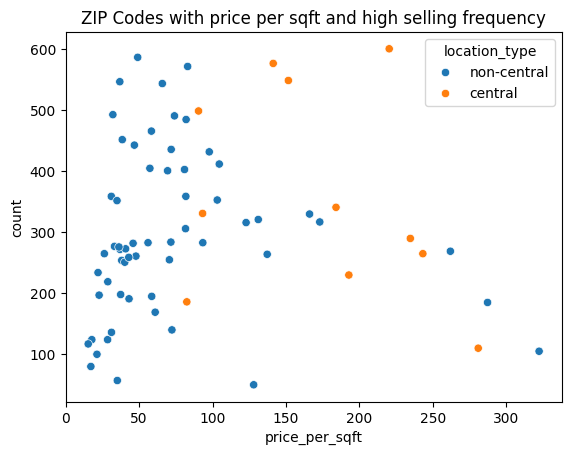

In [15]:
fig_1 = df_zipgroup[["location_type", "count", "price_per_sqft"]]

sns.scatterplot(data = fig_1,
               x= "price_per_sqft",
               y= "count",
               hue = "location_type")
plt.title('ZIP Codes with price per sqft and high selling frequency')
plt.show()

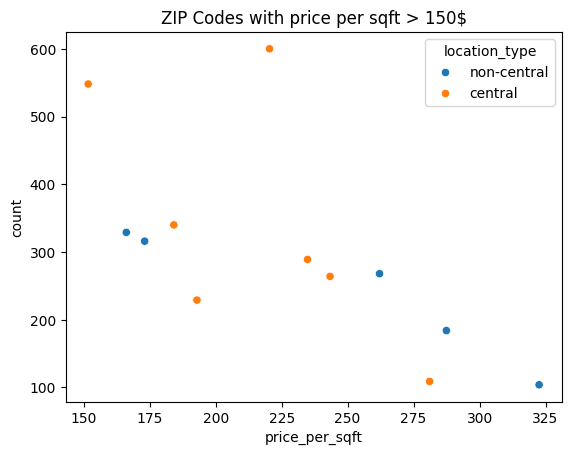

In [16]:
fig_2 = fig_1[ fig_1["price_per_sqft"] > 150]

sns.scatterplot(data = fig_2,
               x= "price_per_sqft",
               y= "count",
               hue = "location_type")
plt.title('ZIP Codes with price per sqft > 150$')
plt.show()

__-Identified-__

- 98103 as fast selling with high price
- 98109 as slow selling with highest price
- 98107 and 98122 as medium fast selling with high price

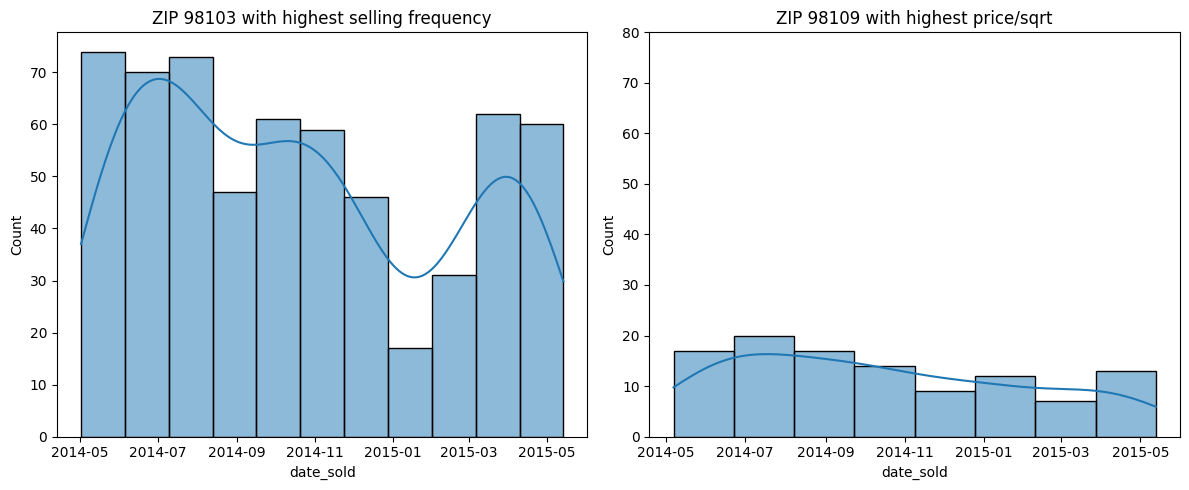

In [24]:
# Get the most recent sale date for each zipcode
df_latest["date_sold"] = pd.to_datetime(df_latest["date"], format="%Y-%m-%d")

fig_3 = df_latest[df_latest["zipcode"] == 98103][["id", "date_sold"]]
fig_4 = df_latest[df_latest["zipcode"] == 98109][["id", "date_sold"]]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # width x height in inches

# First plot on the left
sns.histplot(fig_3,
             x = "date_sold",
             kde = True,
             ax=axes[0])
plt.ylim(0, 80)   # Set y-axis range

axes[0].set_title('ZIP 98103 with highest selling frequency')

# Second plot on the right
sns.histplot(fig_4,
             x = "date_sold",
             kde = True,
             ax=axes[1])
axes[1].set_title('ZIP 98109 with highest price/sqrt')
plt.ylim(0, 80)   # Set y-axis range


plt.tight_layout()
plt.show()


__-2nd part of task-__

Amy needs average outskirt houses over time to hide from the FBI
- wants to buy average looking houses
- need to be far away in outskirts, no civilization

_See slides for a detailed answer_

